In [1]:
import tensorflow as tf
from tensorflow import keras
#from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from PIL import Image
from numpy import asarray
import cv2

In [2]:
can_img = Image.open('can.png')

# summarize some details about the image
print(can_img.format)
print(can_img.size)
print(can_img.mode)

PNG
(1152, 648)
RGB


In [3]:
numpydata = asarray(can_img)
# <class 'numpy.ndarray'>
print(type(numpydata))

#  shape
print(numpydata.shape)
#print(numpydata)

<class 'numpy.ndarray'>
(648, 1152, 3)


In [4]:
np_img = np.array(can_img)
print(np_img.shape)
#print(np_img)

(648, 1152, 3)


In [5]:
tmp = can_img.resize((28, 28))

np_img = np.array(tmp)
#print(np_img.shape)
#print(np_img)

In [6]:
import matplotlib.pyplot as plt

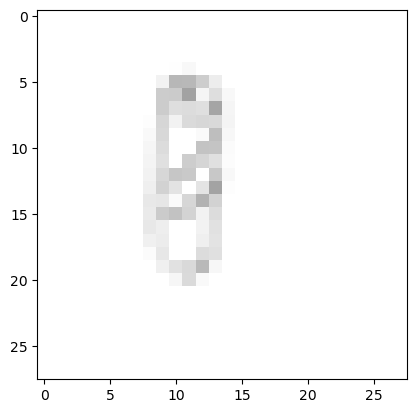

In [7]:
plt.imshow(np_img)

In [8]:
boat_img = Image.open('boat.png')

# summarize some details about the image
print(boat_img.format)
print(boat_img.size)
print(boat_img.mode)

PNG
(28, 28)
RGB


(28, 28, 3)


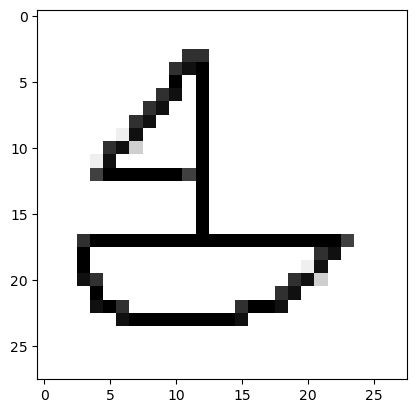

In [9]:
boat_np_img = np.array(boat_img)
print(boat_np_img.shape)
plt.imshow(boat_np_img)

In [10]:
a = np.load('axe.npy')

(124122, 784)
(28, 28)


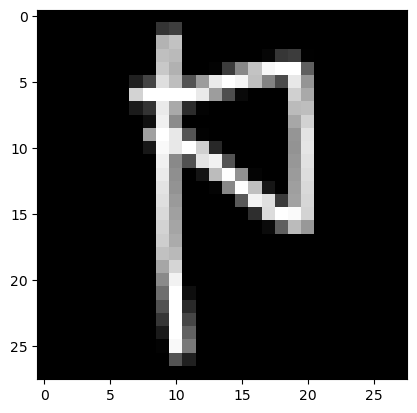

In [11]:
print(a.shape)
a2 = a[10].reshape(28, 28)
#print(a2)
plt.imshow(a2, 'gray')
print(a2.shape)

In [12]:
# Read class names
with open("class_names.txt", "r") as ins:
  class_names = []
  for line in ins:
    class_names.append(line.rstrip('\n'))

In [13]:
# Load the model
test_model = keras.models.load_model('./osy_model.h5')
test_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                  

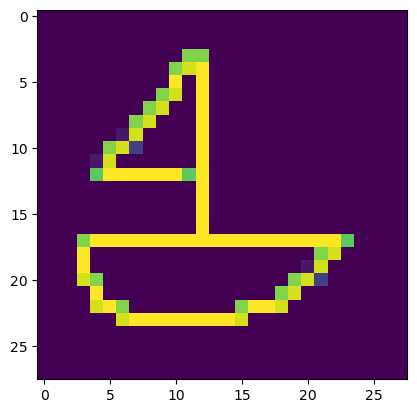

In [14]:
boat_img = cv2.imread('boat.png')
boat_img = cv2.resize(boat_img, (28, 28))
boat_img = cv2.cvtColor(boat_img, cv2.COLOR_BGR2GRAY)
boat_img = boat_img.reshape((28, 28, 1))
boat_img = (255 -boat_img) / 255
plt.imshow(boat_img)

In [15]:
pred = test_model.predict(np.expand_dims(boat_img, axis=0))[0]

1/1 [==============================] - 5s 5s/step


In [16]:
ind = (-pred).argsort()[:10]
latex = [class_names[x] for x in ind]
print(latex)

['sailboat', 'speedboat', 'elbow', 'shark', 'foot', 'broom', 'beach', 'canoe', 'swan', 'finger']


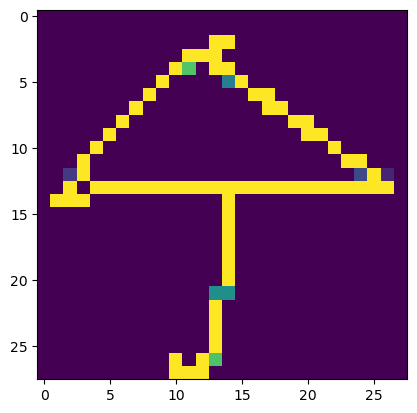

In [17]:
umb_img = cv2.imread('umbrella.png')
umb_img = cv2.resize(umb_img, (28, 28))
umb_img = cv2.cvtColor(umb_img, cv2.COLOR_BGR2GRAY)
umb_img = umb_img.reshape((28, 28, 1))
umb_img = (255 - umb_img) / 255
plt.imshow(umb_img)

In [18]:
pred = test_model.predict(np.expand_dims(umb_img, axis=0))[0]

1/1 [==============================] - 0s 17ms/step


In [19]:
ind = (-pred).argsort()[:10]
latex = [class_names[x] for x in ind]
print(latex)

['umbrella', 'floor_lamp', 'tree', 'stitches', 'beach', 'animal_migration', 'lantern', 'flashlight', 'camouflage', 'palm_tree']
